# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("/home/oktavianu/data/Canada.xlsx",
                   sheet_name="Canada by Citizenship",
                   skiprows=range(20),
                   skipfooter=2)

data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# checking dimension
data.shape

(195, 43)

Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations.

In [4]:
# remove unnecessary columns
data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Rename columns
data.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# consistency: columns' label as string
data.columns = list(map(str, data.columns))

# set country name as index for quickly looking up countries using .loc method
data.set_index('Country', inplace=True)

# add 'Total' Column
data['Total'] = data.select_dtypes(include='number').sum(axis=1)

In [5]:
# years that we will be using, useful for plotting
years = list(map(str, range(1980, 2014)))

In [6]:
print("Data dimensions:", data.shape)

Data dimensions: (195, 38)


## Visualizing Data using Matplotlib

In [7]:
# import matplotlib
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot")

### Pie Charts
A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.  We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

We'll use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

####  Step 1: gather data
We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:
1) **Split**: Splitting the data into groups based on some criteria.
2) **Apply**: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
3) **Combine**: Combining the result into data strucure

In [8]:
# group countries by continents and apply sum() function 
data_continents = data.groupby('Continent', axis=0).sum()

/tmp/ipykernel_5711/522831233.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  data_continents = data.groupby('Continent', axis=0).sum()


In [9]:
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(data.groupby('Continent', axis=0))

/tmp/ipykernel_5711/3088328240.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(data.groupby('Continent', axis=0))


In [10]:
data_continents.head()

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


#### Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

- **autopct** - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- **startangle** - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- **shadow** - Draws a shadow beneath the pie (to give a 3D feel).


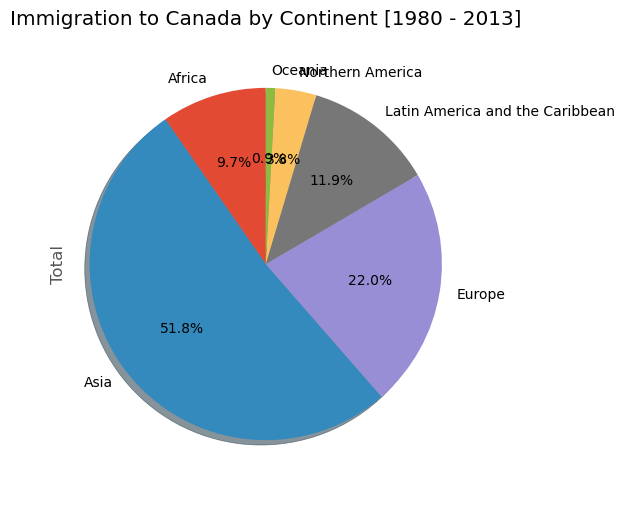

In [11]:
# autopct create %, start angle represent starting point
data_continents['Total'].plot(kind='pie',
                              figsize=(5, 6),
                              autopct='%1.1f%%', # add in percentages
                              startangle=90, # start angle 90 degree (Africa)
                              shadow=True, # add shadow
                              )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # set the pie charts to look like a circle

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Few modifications are needed to improve the visuals:

- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
- Pass in a custom set of colors for continents by passing in colors parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in explode parameter.

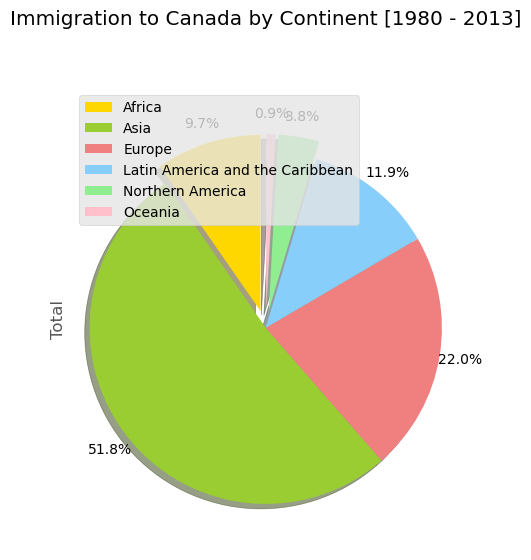

In [12]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

data_continents['Total'].plot(kind='pie',
                              figsize=(5, 6),
                              autopct='%1.1f%%',
                              startangle=90,
                              shadow=True,
                              labels=None, # turn off labels on pie chart
                              pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct 
                              colors=color_list, # add custom colors
                              explode=explode_list, # 'explode` lowest 3 continents`
                              )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=data_continents.index, loc='upper left')

plt.show()

**Question**: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.


In [ ]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # # ratio for each continent with which to offset each wedge.

data_continents['2013'].plot(kind='pie',
                             figsize=(15, 6),
                             autopct='%1.1f%%',
                             startangle=90,
                             shadow=True,
                             labels=None,
                             pctdistance=1.12,
                             )